In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import tensorflow as tf
import seaborn as sns
import itertools
import random

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, BatchNormalization, Input, LayerNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from LSTM_AE_horizontal import LSTMAutoencoderAnomalyDetector

### Original Dataset


In [2]:
df = pd.read_csv('mid_cap_all_sectors_ret.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

In [3]:
lstm_detector = LSTMAutoencoderAnomalyDetector()
lstm_detector.preprocess_data(df)
# lstm_detector.build_model()
# lstm_detector.train_model()

Data preprocessed: 4948 training sequences, 1226 test sequences.


In [4]:
# lstm_detector.plot_train_loss()

In [5]:
# lstm_detector.save_model('D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model.keras')
lstm_detector.load_model('D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model.keras')

Model loaded from D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model.keras.


In [6]:
lstm_detector.evaluate_model()

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model evaluation completed.


In [7]:
anomaly_df = lstm_detector.get_anomaly_dataframe()

In [8]:
anomaly_df

,Materials,Industrials,Health Care,Real Estate,Consumer Discretionary,Financials,Utilities,Information Technology,Energy,Consumer Staples,Communication Services
date,,,,,,,,,,,
2019-10-17,0,0,0,0,0,0,0,0,0,0,0
2019-10-18,0,0,0,0,0,0,0,0,0,0,0
2019-10-21,0,0,0,0,0,0,0,0,0,0,0
2019-10-22,0,0,0,0,0,0,0,0,0,0,0
2019-10-23,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,0,0,0,0,0,0,0,0,0,0,0
2024-08-27,0,0,0,0,0,0,0,0,0,0,0
2024-08-28,0,0,0,0,0,0,0,0,0,0,0


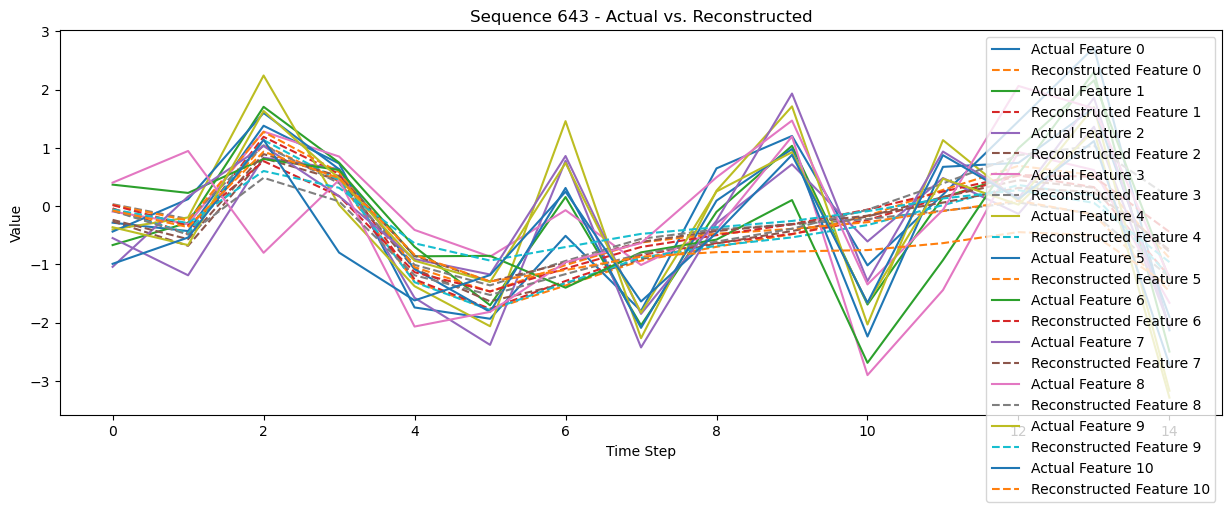

In [9]:
lstm_detector.plot_random_sequence()

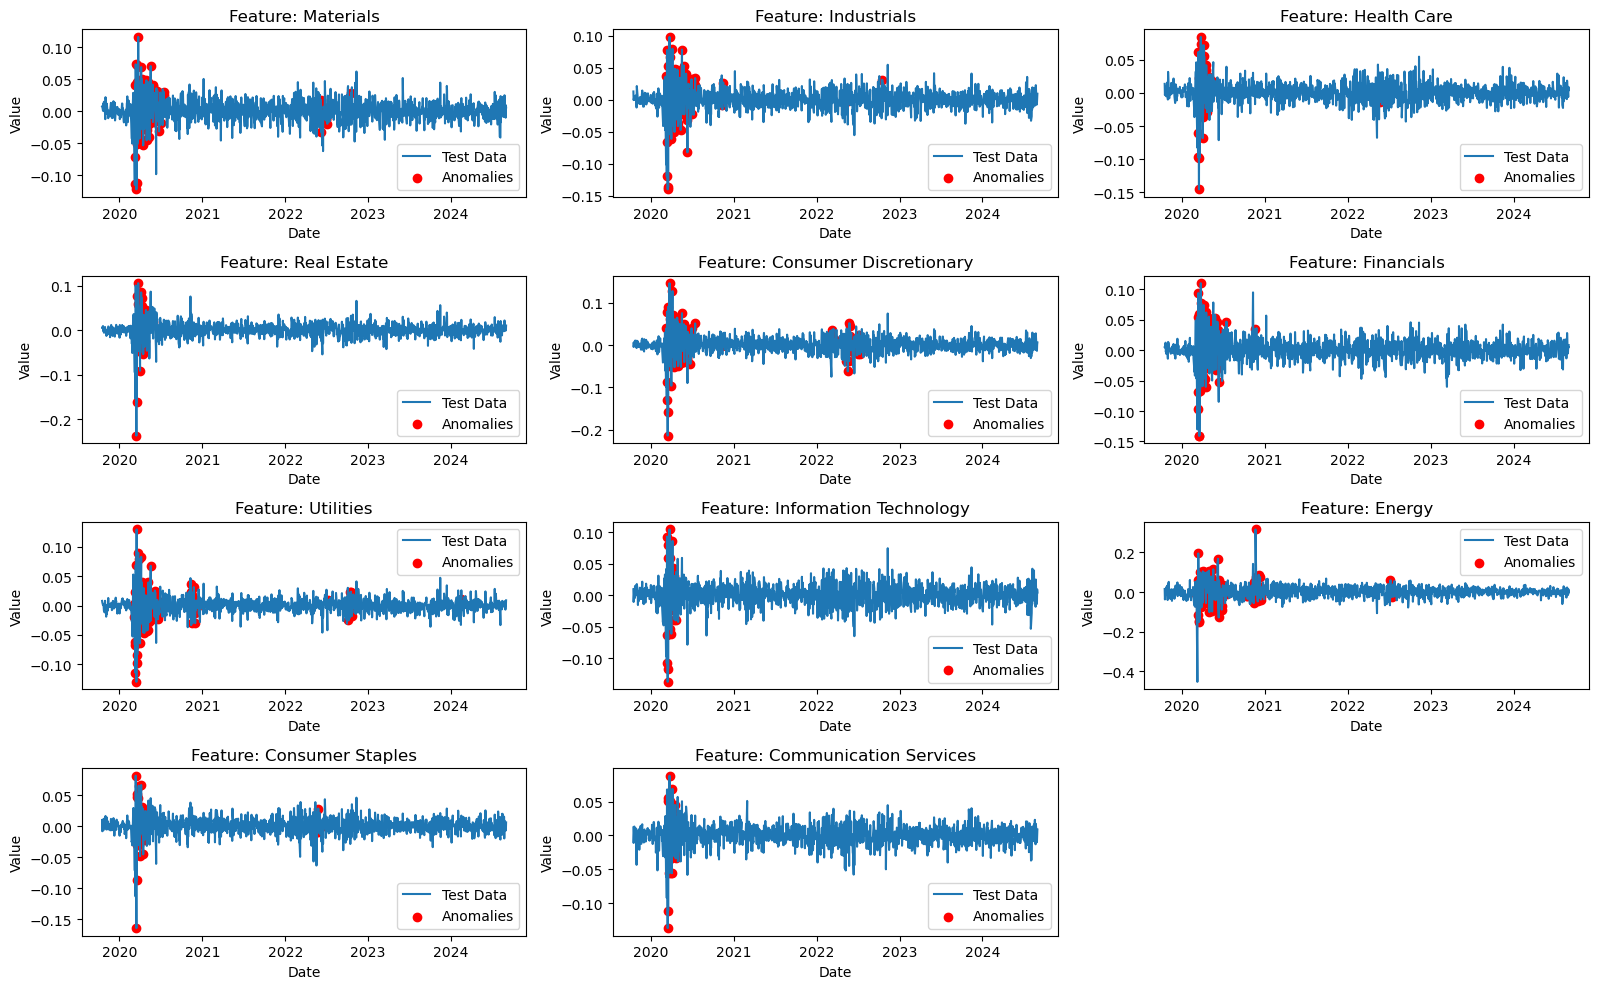

In [10]:
lstm_detector.plot_anomalies()

### Dataset w/ 2008 removed

In [11]:
start_date = '2008-08-01'
end_date = '2009-04-01'

new_df = df[~((df.index >= start_date) & (df.index <= end_date))]

print(f"Data after removing date range from {start_date} to {end_date}:")
print(new_df.index.min(), "to", new_df.index.max())

Data after removing date range from 2008-08-01 to 2009-04-01:
2000-01-04 00:00:00 to 2024-08-30 00:00:00


In [12]:
lstm_detector_new = LSTMAutoencoderAnomalyDetector()
lstm_detector_new.preprocess_data(new_df)
# lstm_detector_new.build_model()
# lstm_detector_new.train_model()

Data preprocessed: 4813 training sequences, 1193 test sequences.


In [13]:
# lstm_detector_new.plot_train_loss()

In [14]:
# lstm_detector_new.save_model('D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model_no08.keras')
lstm_detector_new.load_model('D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model_no08.keras')

Model loaded from D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model_no08.keras.


In [15]:
lstm_detector_new.evaluate_model()

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model evaluation completed.


In [16]:
anomaly_df_new = lstm_detector_new.get_anomaly_dataframe()

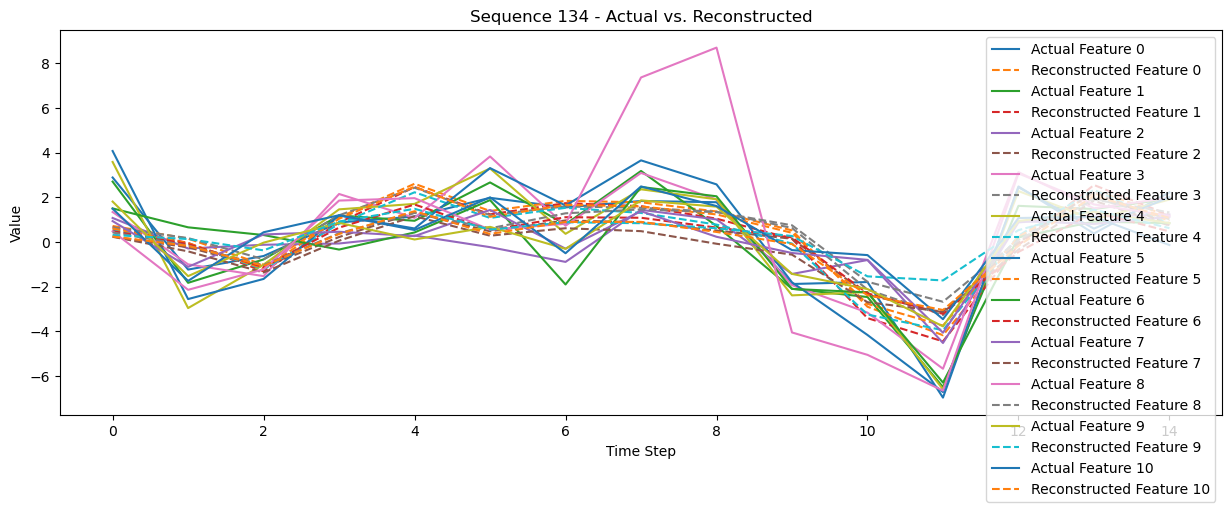

In [17]:
lstm_detector_new.plot_random_sequence()

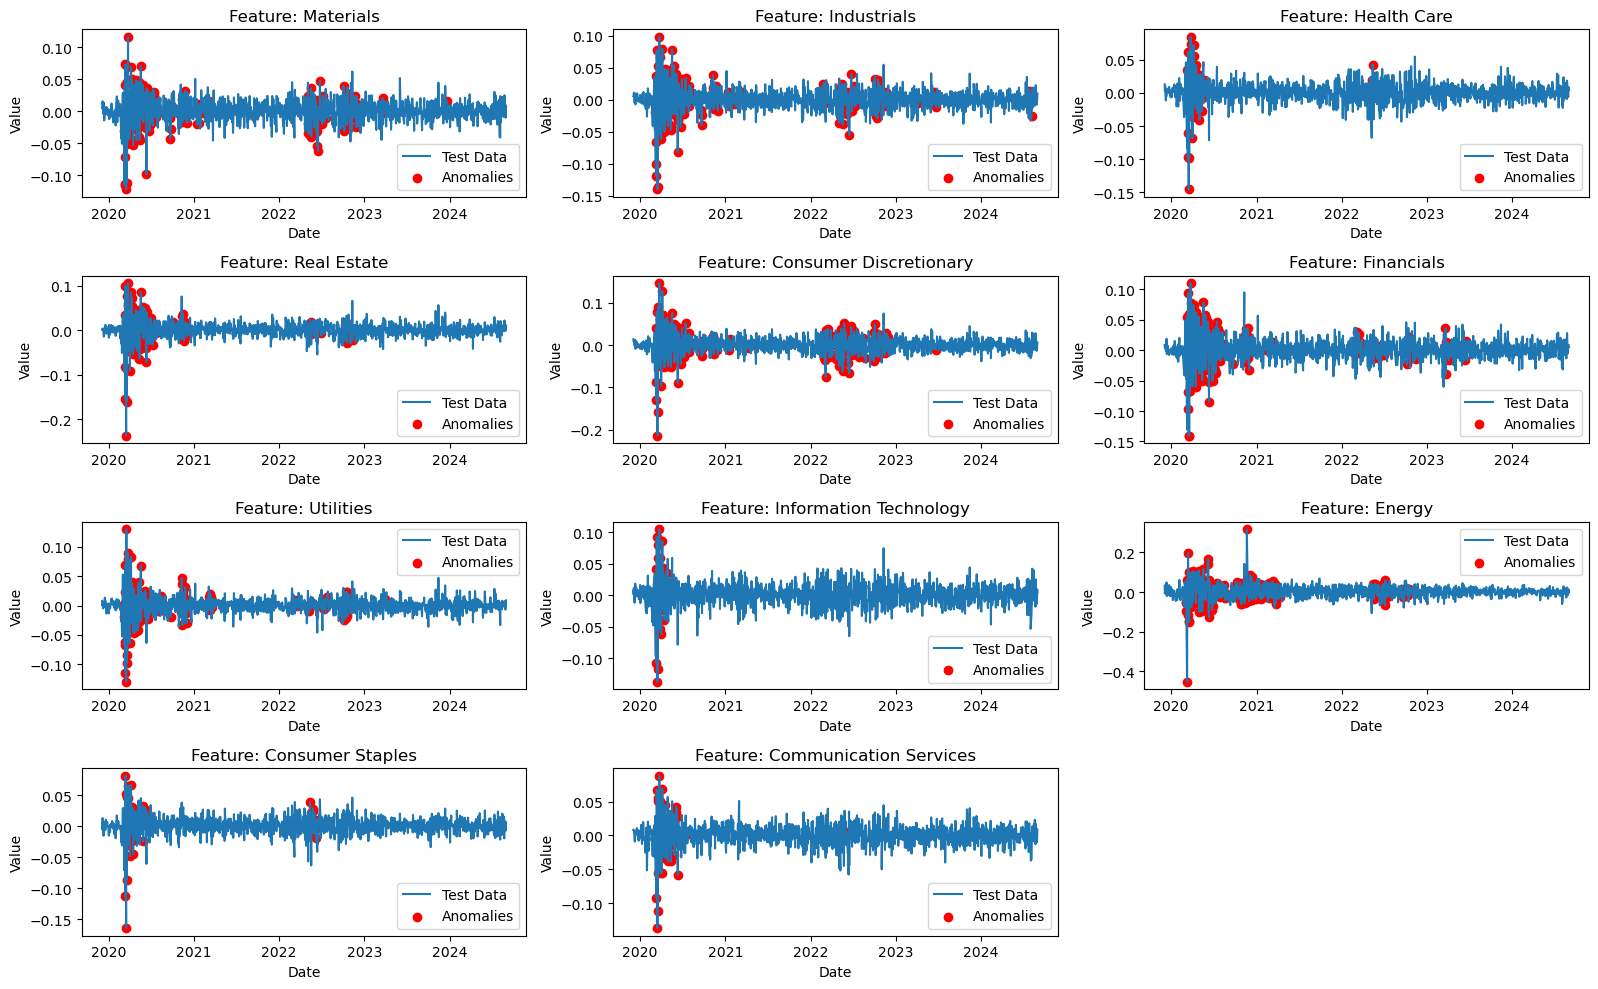

In [18]:
lstm_detector_new.plot_anomalies()

In [19]:
df_cnn = pd.read_csv('Anomaly_Dataset/cnn.csv', parse_dates=['date'])

In [20]:
df_cnn.set_index('date', inplace=True)

anomaly_df = anomaly_df.reindex(df_cnn.index)

anomaly_df.fillna(0, inplace=True)


In [21]:
anomaly_df

,Materials,Industrials,Health Care,Real Estate,Consumer Discretionary,Financials,Utilities,Information Technology,Energy,Consumer Staples,Communication Services
date,,,,,,,,,,,
2019-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-08-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dynamic Threshold

In [23]:
from LSTM_AE_dynamic import LSTMAutoencoderAnomalyDetector_Dynamic

In [24]:
df = pd.read_csv('mid_cap_all_sectors_ret.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

In [25]:
lstm_dynamic = LSTMAutoencoderAnomalyDetector_Dynamic()
lstm_dynamic.preprocess_data(df)
# lstm_dynamic.build_model()
# lstm_dynamic.train_model()

Data preprocessed: 4920 training sequences, 1198 test sequences.


In [26]:
# lstm_dynamic.plot_train_loss()

In [27]:
# lstm_dynamic.save_model('D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model_dynamic.keras')
lstm_dynamic.load_model('D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model_dynamic.keras')

Model loaded from D:\School_Work\Bloomberg_Project\LSTM_trained_models\lstm_autoencoder_model_dynamic.keras.


In [28]:
lstm_dynamic.evaluate_model()

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model evaluation with dynamic thresholds completed.


In [29]:
anomaly_df_dynamic = lstm_dynamic.get_anomaly_dataframe()

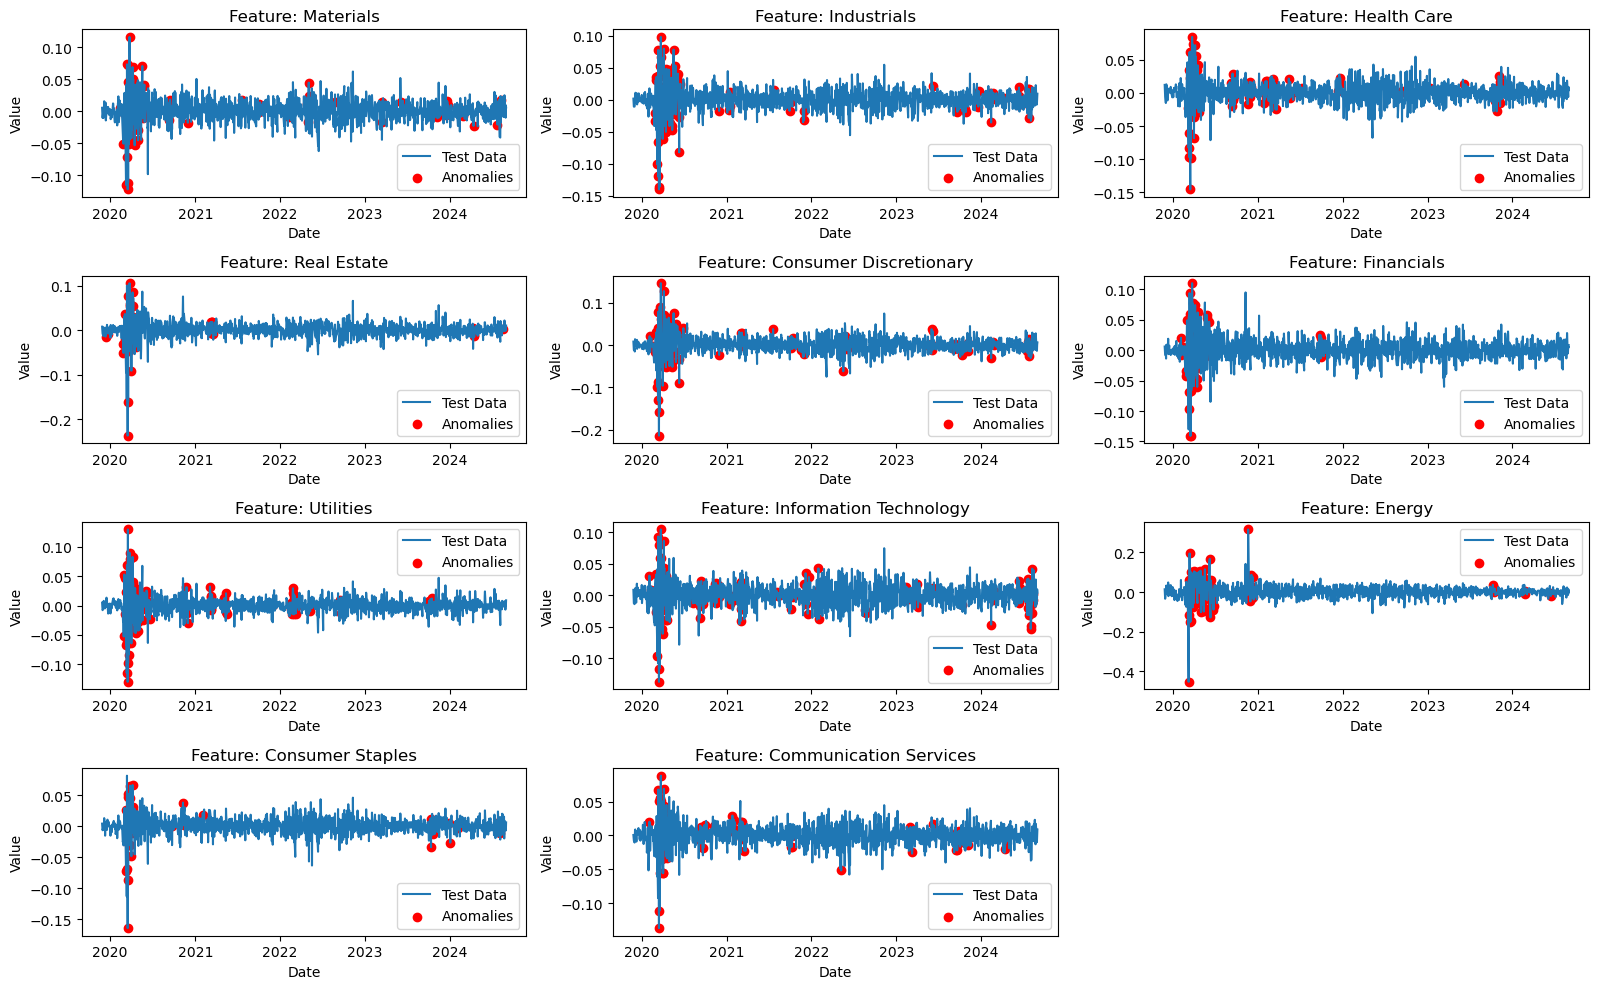

In [30]:
lstm_dynamic.plot_anomalies()

In [31]:
anomaly_df_dynamic = anomaly_df_dynamic.reindex(anomaly_df.index, fill_value=0)

In [ ]:
# anomaly_df.to_csv('lstm_anomaly.csv', index=True)
# anomaly_df_dynamic.to_csv('lstm_dynamic.csv', index=True)

### Comparison between Two Models

In [33]:
anomaly_df.sum(axis=0)

Materials                  84.0
Industrials                82.0
Health Care                36.0
Real Estate                32.0
Consumer Discretionary     98.0
Financials                 57.0
Utilities                 103.0
Information Technology     29.0
Energy                    116.0
Consumer Staples           33.0
Communication Services     29.0
dtype: float64

In [34]:
anomaly_df_dynamic.sum(axis=0)

Materials                  76
Industrials               107
Health Care                93
Real Estate                37
Consumer Discretionary    103
Financials                 51
Utilities                  97
Information Technology    116
Energy                     89
Consumer Staples           36
Communication Services     68
dtype: int64

In [35]:
# pandemic period
pandemic_start='2020-03-01'
pandemic_end='2020-08-01'

In [36]:
anomaly_df.loc[pandemic_start:pandemic_end].sum(axis=0)

Materials                 72.0
Industrials               77.0
Health Care               34.0
Real Estate               32.0
Consumer Discretionary    72.0
Financials                55.0
Utilities                 76.0
Information Technology    29.0
Energy                    81.0
Consumer Staples          29.0
Communication Services    29.0
dtype: float64

In [37]:
anomaly_df_dynamic[pandemic_start:pandemic_end].sum(axis=0)

Materials                 42
Industrials               67
Health Care               36
Real Estate               22
Consumer Discretionary    59
Financials                39
Utilities                 54
Information Technology    30
Energy                    67
Consumer Staples          22
Communication Services    28
dtype: int64

In [38]:
# overlap
overlap_anomaly = pd.DataFrame(index=anomaly_df.index, columns=anomaly_df.columns)

for sector in anomaly_df.columns:
     anomaly_sum_sector = anomaly_df[sector] + anomaly_df_dynamic[sector]
     overlap_anomaly[sector] = (anomaly_sum_sector > 1).astype(int)

In [39]:
overlap_anomaly[pandemic_start:pandemic_end].sum(axis=0)

Materials                 41
Industrials               63
Health Care               31
Real Estate               19
Consumer Discretionary    55
Financials                36
Utilities                 50
Information Technology    26
Energy                    66
Consumer Staples          19
Communication Services    27
dtype: int64